In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df = pd.read_csv('data/csv/paranaque_saved_coordinates.csv')
df

,X,Y
0,120.984143,14.533076
1,120.983244,14.520337
2,121.001600,14.451343
3,121.001111,14.445416
4,121.000840,14.441625
...,...,...
292,120.999281,14.473465
293,120.999523,14.532113
294,121.000187,14.527818
295,121.000187,14.507387


In [22]:
geometry = gpd.points_from_xy(df['X'], df['Y'], crs="EPSG:4326")
street_points = gpd.GeoDataFrame(geometry=geometry)  
len(street_points)

297

<AxesSubplot: >

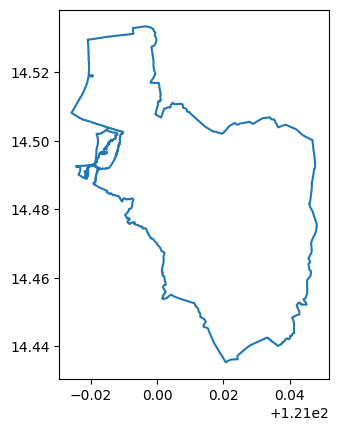

In [4]:
philippines = gpd.read_file('maps/phl_admbnda_adm3_psa_namria_20231106.zip')

paranaque = philippines[philippines['ADM3_EN'] == 'City of Parañaque']
paranaque.boundary.plot()

<AxesSubplot: >

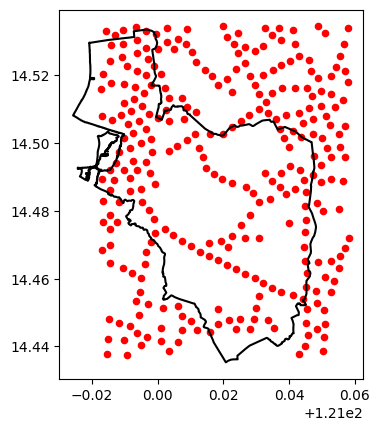

In [5]:
base = paranaque.boundary.plot(edgecolor='black')
street_points.plot(ax=base, markersize=20, color='red')

In [23]:
clipped = gpd.clip(street_points, paranaque)
len(clipped)

131

In [24]:
clipped

,geometry
168,POINT (121.04418 14.45400)
157,POINT (121.04132 14.45518)
138,POINT (121.03768 14.45600)
179,POINT (121.04506 14.45753)
178,POINT (121.04534 14.46152)
...,...
279,POINT (120.99715 14.52485)
255,POINT (120.99375 14.52643)
271,POINT (120.99627 14.52805)
254,POINT (120.99358 14.53027)


<AxesSubplot: >

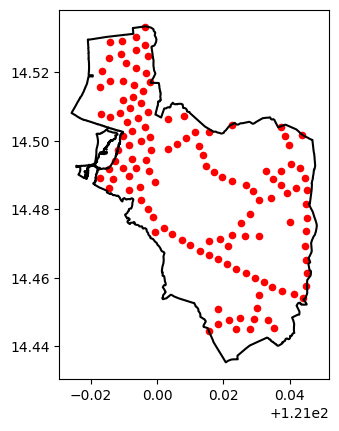

In [25]:
base = paranaque.boundary.plot(edgecolor='black')
clipped.plot(ax=base, markersize=20, color='red')

In [26]:
df = pd.DataFrame({'X': clipped.geometry.x, 'Y': clipped.geometry.y})
df.to_csv('data/csv/paranaque_filtered_coordinates.csv', index=False)